<a href="https://colab.research.google.com/github/bukky1707/Data-Analysis/blob/main/OutlanderActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
netflix_data = pd.read_csv('ViewingActivity.csv')
netflix_data.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ayo,2021-12-30 13:23:17,00:12:08,NaN,The Witcher: Season 2: What Is Lost (Episode 3),NaN,Apple iPhone 11,00:14:33,00:14:33,US (United States)
1,Ayo,2021-12-30 12:47:03,00:34:36,NaN,The Witcher: Season 2: Kaer Morhen (Episode 2),NaN,Apple iPhone 11,00:54:18,00:54:18,US (United States)
2,Ayo,2021-12-30 12:33:42,00:12:35,NaN,The Witcher: Season 2: A Grain of Truth (Episo...,NaN,Apple iPhone 11,00:59:14,00:59:14,US (United States)
3,Ayo,2021-12-30 05:21:37,00:33:33,NaN,The Witcher: Season 2: A Grain of Truth (Episo...,NaN,Apple iPhone 11,00:36:30,Not latest view,US (United States)
4,Ayo,2021-12-30 04:29:56,00:44:05,NaN,The Witcher: Season 1: Much More (Episode 8),NaN,Apple iPhone 11,00:57:04,00:57:04,US (United States)


In [3]:
netflix_data.shape

(6946, 10)

In [4]:
netflix_data = netflix_data.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

In [5]:
netflix_data.head(1)

,Start Time,Duration,Title
0,2021-12-30 13:23:17,00:12:08,The Witcher: Season 2: What Is Lost (Episode 3)


In [6]:
netflix_data.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [7]:
netflix_data['Start Time'] = pd.to_datetime(netflix_data['Start Time'],utc=True)

In [8]:
netflix_data.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [9]:
netflix_data = netflix_data.set_index('Start Time')
# convert from UTC timezone to eastern time
netflix_data.index = netflix_data.index.tz_convert('US/Eastern')
# reset the index so that Start Time becomes a column again
netflix_data = netflix_data.reset_index()
#double-check that it worked
netflix_data.head(1)

,Start Time,Duration,Title
0,2021-12-30 08:23:17-05:00,00:12:08,The Witcher: Season 2: What Is Lost (Episode 3)


In [10]:
netflix_data['Duration'] = pd.to_timedelta(netflix_data['Duration'])
netflix_data.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [11]:
outlander = netflix_data[netflix_data['Title'].str.contains('Outlander', regex=False)]

In [12]:
outlander.sample(20)

,Start Time,Duration,Title
3592,2021-02-16 01:09:53-05:00,0 days 00:00:59,"Outlander: Season 2: Through a Glass, Darkly (..."
3061,2021-04-25 03:10:19-04:00,0 days 00:52:06,Outlander: Season 3: The Doldrums (Episode 9)
3583,2021-02-19 02:18:03-05:00,0 days 00:23:36,Outlander: Season 2: Untimely Resurrection (Ep...
3027,2021-04-28 01:49:04-04:00,0 days 01:02:45,Outlander: Season 3: A. Malcolm (Episode 6)
3062,2021-04-25 02:13:55-04:00,0 days 00:55:30,Outlander: Season 3: First Wife (Episode 8)
3212,2021-04-11 02:45:13-04:00,0 days 00:13:00,Outlander: Season 1: Both Sides Now (Episode 8)
3026,2021-04-28 02:53:15-04:00,0 days 00:47:20,Outlander: Season 4: The Birds & The Bees (Epi...
3033,2021-04-27 22:17:49-04:00,0 days 00:10:16,Outlander: Season 4: The False Bride (Episode 3)
3137,2021-04-18 00:50:53-04:00,0 days 00:02:31,Outlander: Season 3: Surrender (Episode 2)
3581,2021-02-19 10:41:21-05:00,0 days 00:21:29,Outlander: Season 2: Best Laid Schemes (Episod...


In [13]:
outlander.shape

(80, 3)

In [14]:
outlander = outlander[(outlander['Duration'] > '0 days 00:02:00')]

In [15]:
outlander.head(20)

,Start Time,Duration,Title
3025,2021-04-28 03:40:38-04:00,0 days 00:11:13,Outlander: Season 4: The Deep Heart's Core (Ep...
3026,2021-04-28 02:53:15-04:00,0 days 00:47:20,Outlander: Season 4: The Birds & The Bees (Epi...
3027,2021-04-28 01:49:04-04:00,0 days 01:02:45,Outlander: Season 3: A. Malcolm (Episode 6)
3028,2021-04-28 00:58:52-04:00,0 days 00:50:03,Outlander: Season 3: Freedom & Whiskey (Episod...
3029,2021-04-27 23:51:02-04:00,0 days 00:55:53,Outlander: Season 3: Of Lost Things (Episode 4)
3030,2021-04-27 22:51:41-04:00,0 days 00:56:03,Outlander: Season 3: All Debts Paid (Episode 3)
3031,2021-04-27 22:29:14-04:00,0 days 00:22:24,Outlander: Season 3: Surrender (Episode 2)
3033,2021-04-27 22:17:49-04:00,0 days 00:10:16,Outlander: Season 4: The False Bride (Episode 3)
3034,2021-04-27 21:54:10-04:00,0 days 00:21:35,Outlander: Season 4: Do No Harm (Episode 2)
3044,2021-04-26 00:02:14-04:00,0 days 00:10:26,Outlander: Season 4: Do No Harm (Episode 2)


In [16]:
outlander.shape

(65, 3)

In [17]:
outlander['Duration'].sum()

Timedelta('1 days 10:31:55')

In [18]:
outlander['weekday'] = outlander['Start Time'].dt.weekday
outlander['hour'] = outlander['Start Time'].dt.hour
# check to make sure the columns were added correctly
outlander.head(1)

,Start Time,Duration,Title,weekday,hour
3025,2021-04-28 03:40:38-04:00,0 days 00:11:13,Outlander: Season 4: The Deep Heart's Core (Ep...,2,3


In [19]:
import matplotlib.pyplot as plt


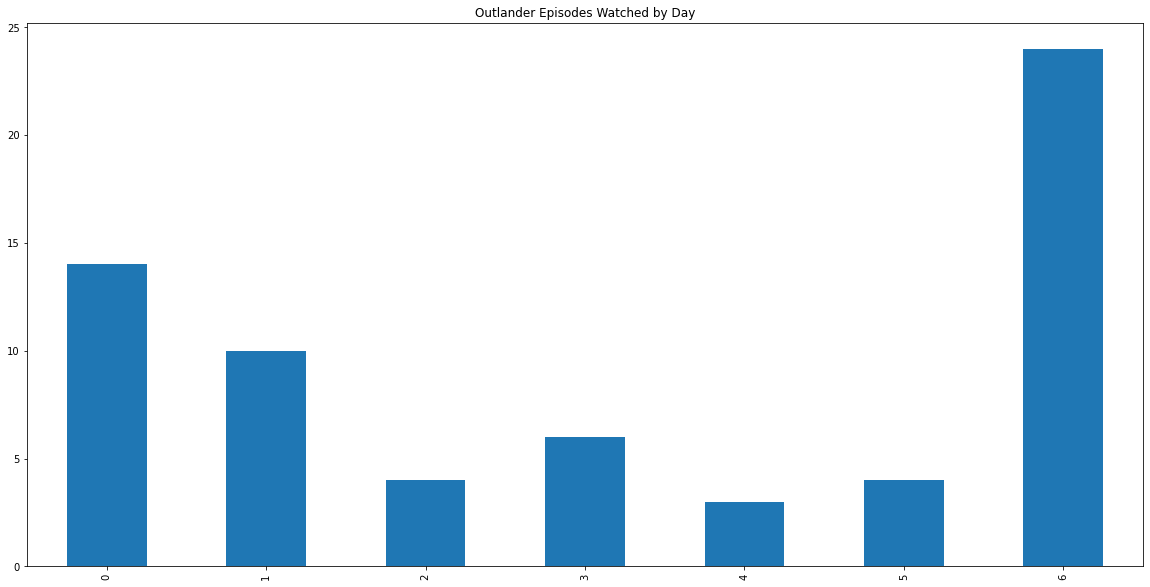

In [20]:
outlander['weekday'] = pd.Categorical(outlander['weekday'], categories= [0,1,2,3,4,5,6], ordered=True)
# create office_by_day and count the rows for each weekday, assigning the result to that variable
outlander_by_day = outlander['weekday'].value_counts()# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
outlander_by_day = outlander_by_day.sort_index()# plot office_by_day as a bar chart with the listed size and title
outlander_by_day.plot(kind='bar', figsize=(20,10), title='Outlander Episodes Watched by Day')

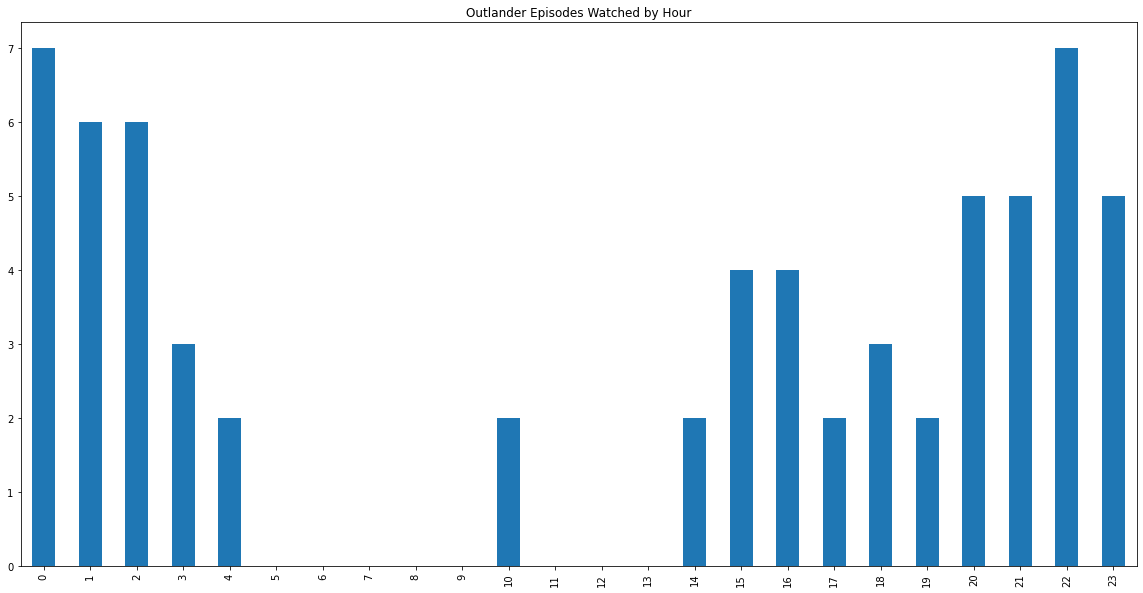

In [21]:
outlander['hour'] = pd.Categorical(outlander['hour'], categories= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)# create outlander_by_hour and count the rows for each hour, assigning the result to that variable
outlander_by_hour = outlander['hour'].value_counts()# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
outlander_by_hour = outlander_by_hour.sort_index()# plot office_by_hour as a bar chart with the listed size and title
outlander_by_hour.plot(kind='bar', figsize=(20,10), title='Outlander Episodes Watched by Hour')